<a href="https://colab.research.google.com/github/shyakx/churn_modelling/blob/main/Summative_Intro_to_ml_Steven_Shyaka_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Churn Prediction using Machine Learning Models**

This notebook explores the implementation of machine learning models for customer churn prediction, applying optimization techniques such as regularization, early stopping, and hyperparameter tuning.

## 1. Load Required Libraries
Import necessary libraries for data processing, visualization, and model training.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

****
## 2. Load and Preprocess Dataset
- Load the dataset.
- Drop unnecessary columns to reduce noise.
- Encode categorical variables.
- Scale numerical features to improve model performance.


In [3]:
# Load Dataset
file_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target variable
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

****

## 3. Implement Classical ML Model (Logistic Regression)
- Train a logistic regression model as a baseline.
- Evaluate performance.

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



****

## 4. Implement Basic Neural Network
- Create a simple NN model without optimizations.
- Train and evaluate.

In [5]:
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Basic Neural Network Report:\n", classification_report(y_test, y_pred_nn))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6698 - loss: 0.6103 - val_accuracy: 0.7925 - val_loss: 0.4732
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.4488 - val_accuracy: 0.8206 - val_loss: 0.4317
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8128 - loss: 0.4280 - val_accuracy: 0.8388 - val_loss: 0.4099
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.4076 - val_accuracy: 0.8475 - val_loss: 0.3939
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3988 - val_accuracy: 0.8531 - val_loss: 0.3793
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8523 - loss: 0.3678 - val_accuracy: 0.8575 - val_loss: 0.3682
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8404 - loss: 0.3849 - val_accuracy: 0.8594 - val_loss: 0.3586
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8482 - loss: 0.3619 - val_accuracy: 0.8600 - val_

*****
## 5. Implement Optimized Neural Network
- Apply dropout layers, learning rate tuning, and early stopping.
- Evaluate the model.

In [6]:
nn_optimized = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_optimized.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
nn_optimized.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_nn_opt = (nn_optimized.predict(X_test) > 0.5).astype("int32")
print("Optimized Neural Network Report:\n", classification_report(y_test, y_pred_nn_opt))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6148 - loss: 0.6470 - val_accuracy: 0.8000 - val_loss: 0.4482
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8006 - loss: 0.4670 - val_accuracy: 0.8087 - val_loss: 0.4246
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8093 - loss: 0.4426 - val_accuracy: 0.8213 - val_loss: 0.4145
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8232 - loss: 0.4187 - val_accuracy: 0.8356 - val_loss: 0.4047
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8151 - loss: 0.4331 - val_accuracy: 0.8450 - val_loss: 0.3939
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8165 - loss: 0.4351 - val_accuracy: 0.8444 - val_loss: 0.3901
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8257 - loss: 0.4254 - val_accuracy: 0.8506 - val_loss: 0.3819
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8295 - loss: 0.4133 - val_accuracy: 0.8581 - val_

****
## 6. Model Performance Comparison
- Compare models using confusion matrices and ROC-AUC scores.

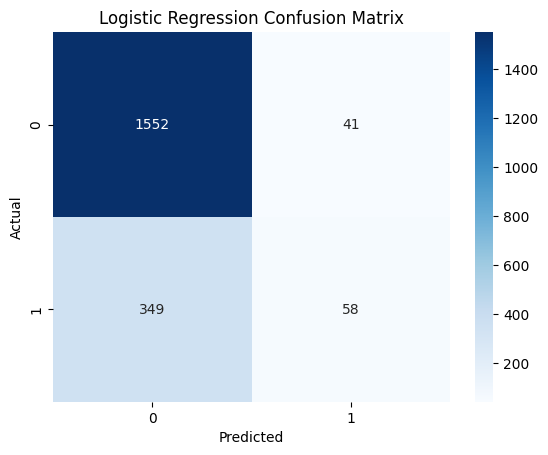

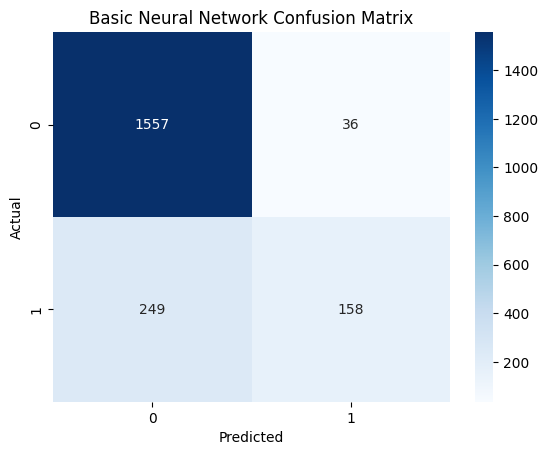

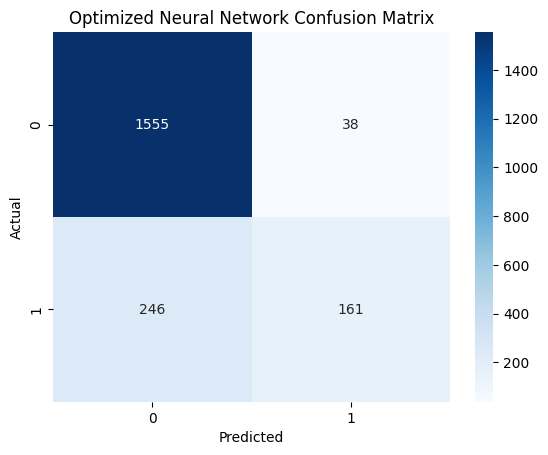

ROC-AUC Scores:
Logistic Regression: 0.558384270248677
Basic Neural Network: 0.6828037590749455
Optimized Neural Network: 0.6858615163699909


In [7]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn, "Basic Neural Network Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn_opt, "Optimized Neural Network Confusion Matrix")

print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, y_pred_log))
print("Basic Neural Network:", roc_auc_score(y_test, y_pred_nn))
print("Optimized Neural Network:", roc_auc_score(y_test, y_pred_nn_opt))

****
## 7. Sample Predictions
- Display 5 random test instances and compare actual vs predicted values.

In [8]:
sample_indices = np.random.choice(len(X_test), 5, replace=False)
X_sample = X_test[sample_indices]
y_actual = y_test.iloc[sample_indices].values
y_pred_sample = (nn_optimized.predict(X_sample) > 0.5).astype("int32")

print("\nSample Predictions:")
for i in range(5):
    print(f"Instance {i+1}:")
    print(f"  Actual Churn: {y_actual[i]}")
    print(f"  Predicted Churn: {y_pred_sample[i][0]}")
    print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Sample Predictions:
Instance 1:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 2:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 3:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 4:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 5:
  Actual Churn: 1
  Predicted Churn: 0
------------------------------
